IMPORT DATASETS


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors._kd_tree import KDTree
import time
from data_utils import load_dataset

## Testing Cell: ignore this cell

In [15]:
#n = int(x_train.shape[0])
#print(n)

randy = np.random.permutation([0,1,2,3,4,5,6,7,8])
randy1 = [11,11,11,11]
randy2 = [12,12,12]
indices = np.array(range(0,5))
#print(np.random.permutation(indices))
#print(randy)
#lol = list(split(randy, 3))
#print(np.concatenate([randy, randy1, randy2]))

###print(n)
yxx = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])

a = np.zeros((len(yxx), len(yxx[0])))
print(a)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [2]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')
print(x_train)

[[-1.04063798e+00]
 [-1.03590513e+00]
 [-1.03117228e+00]
 [-1.02638241e+00]
 [-1.02164955e+00]
 [-1.01691670e+00]
 [-1.01212683e+00]
 [-1.00739398e+00]
 [-1.00266113e+00]
 [-9.97871255e-01]
 [-9.93138404e-01]
 [-9.88405553e-01]
 [-9.83615680e-01]
 [-9.78882829e-01]
 [-9.74149978e-01]
 [-9.69360105e-01]
 [-9.64627254e-01]
 [-9.59894403e-01]
 [-9.55104530e-01]
 [-9.50371679e-01]
 [-9.45638828e-01]
 [-9.40848955e-01]
 [-9.36116104e-01]
 [-9.31383253e-01]
 [-9.26593379e-01]
 [-9.21860529e-01]
 [-9.17127678e-01]
 [-9.12337804e-01]
 [-9.07604953e-01]
 [-9.02872102e-01]
 [-8.98082229e-01]
 [-8.93349378e-01]
 [-8.88616527e-01]
 [-8.83826654e-01]
 [-8.79093803e-01]
 [-8.74360952e-01]
 [-8.69571079e-01]
 [-8.64838228e-01]
 [-8.60105377e-01]
 [-8.55315504e-01]
 [-8.50582653e-01]
 [-8.45849802e-01]
 [-8.41059928e-01]
 [-8.36327077e-01]
 [-8.31594226e-01]
 [-8.26804353e-01]
 [-8.22071502e-01]
 [-8.17338651e-01]
 [-8.12548778e-01]
 [-8.07815927e-01]
 [-8.03083076e-01]
 [-7.98293203e-01]
 [-7.9356035

### Q1: k-NN Regression
- Can modify the classification k-NN slightly to achieve a regression function

In [2]:
def knn_regression(x_train, y_train, x_test, k=1, l = 2):
    '''
    k-NN regression modified from lecture: tests one point at a time, have to loop through test points 
    '''
    # get the indicies of the k nearest neighbours to x_test
    if l == 2:
        dist = np.sqrt(np.sum(np.square(x_train-x_test), axis=1))
    elif l == 1:
        dist = np.sum(x_train-x_test, axis=1)
    i_nn = np.argpartition(dist, kth=k)[:k]
    # i_nn are the indices of the nearest neighbours: y_test is average of these y values 
    temp = 0
    for i in i_nn:
        temp += y_train[i]
    y_test = temp/k
    return y_test

5-fold cross validation and getting Test RMSE
- We judge the best $k$ and $l$ values using the RMSE output given by the cross_validation function, and use these settings to test the data using the test_RMSE function

In [3]:
def cross_validation(x_train, y_train, k=1, l=2, mauna=False):
    '''
    returns cross validation RMSE loss. If the bool mauna is set to true, the function will output the cross validation prediction set to be plotted - used for testing the mauna loa set
    '''
    RMSE_set_avg = 0
    if mauna == True:
        plot_x = []
        plot_y = []
    # divide dataset into five guys
    n = len(x_train) # Equivalent to len(dataset)
    np.random.seed(101)
    indices = np.array_split(np.random.permutation(np.array(range(0, n))), 5) # Randomized indices to draw from, split into 5 guys

    set0 = [indices[0], np.concatenate([indices[1], indices[2], indices[3], indices[4]])]
    set1 = [indices[1], np.concatenate([indices[0], indices[2], indices[3], indices[4]])]
    set2 = [indices[2], np.concatenate([indices[0], indices[1], indices[3], indices[4]])]
    set3 = [indices[3], np.concatenate([indices[0], indices[1], indices[2], indices[4]])]
    set4 = [indices[4], np.concatenate([indices[0], indices[1], indices[2], indices[3]])]
    all_sets = [set0, set1, set2, set3, set4]
    # seti[0] is validation, seti[1] is training
    for set in all_sets:
        # clear dummy variables
        RMSE_datapt = 0
        # make the mini training set using set[1]: which are indices
        x_mini_train = np.zeros((len(set[1]), x_train.shape[1]))
        y_mini_train = np.zeros((len(set[1]), y_train.shape[1]))
        for i in range(len(set[1])):
            x_mini_train[i] = x_train[set[1][i]]
            y_mini_train[i] = y_train[set[1][i]]
        # compute RMSE error between training set and each validation point
        for idx in set[0]:
            y_prediction = knn_regression(x_mini_train, y_mini_train, x_train[idx], k, l)
            if mauna == True:
                plot_x.append(x_train[idx][0])
                plot_y.append(y_prediction[0])
            RMSE_datapt += np.sqrt(np.mean(np.square(y_train[idx] - y_prediction)))
        RMSE_set_avg += RMSE_datapt/len(set[0])
    if mauna == True:
        return RMSE_set_avg/5, plot_x, plot_y
    return RMSE_set_avg/5

def get_test_RMSE(x_train, y_train, x_test_set, y_test_set, k, l):
    '''
    gets RMSE loss of every test point
    '''
    RMSE_avg = 0
    for i in range(len(x_test_set)):
        RMSE_avg += np.sqrt(np.mean(np.square(y_test_set[i] - knn_regression(x_train, y_train, x_test_set[i], k, l))))
    return RMSE_avg/len(x_test_set)

Mauna Loa Dataset
- As discussed in lecture, k should be less than roughly $\sqrt{n}$ = $\sqrt{511}$ ~ 25. We will thus try k values in the range of 1 to 25, trying the $l_{2}$ and $l_{1}$ heuristics for all k.


In [5]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')
# stack the sets for cross validation
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])         

min_RMSE = 10000
min_k, min_l = -1, -1
RMSE = 0

for k in range(1,25+1):
    for l in range(1,2+1):
        RMSE = cross_validation(x_train, y_train, k, l)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_k = k
            min_l = l
test_rmse = get_test_RMSE(x_train, y_train, x_test, y_test, min_k, min_l)
print("Cross Validation RMSE value:", RMSE, ", settings: k =", min_k, ", l =", min_l, ", Test RMSE value:", test_rmse)

Cross Validation RMSE value: 0.06262009459783593 , settings: k = 2 , l = 2 , Test RMSE value: 0.40466508623304215


Rosenbrock
- n = 1000, so we will take k < 31

In [7]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('rosenbrock', n_train=1000, d=2)
# stack the sets for cross validation
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])         

min_RMSE = 10000
min_k, min_l = -1, -1
RMSE = 0
for k in range(1,31+1):
    for l in range(1,2+1):
        RMSE = cross_validation(x_train, y_train, k, l)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_k = k
            min_l = l
test_rmse = get_test_RMSE(x_train, y_train, x_test, y_test, min_k, min_l)
print("Cross Validation RMSE value:", RMSE, ", settings: k =", min_k, ", l =", min_l, ", Test RMSE value:", test_rmse)

Cross Validation RMSE value: 0.11665099096796594 , settings: k = 1 , l = 2 , Test RMSE value: 0.06810446933737938


pumadyn32nm
- n = 5733, choose k < 76

In [128]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')
# stack the sets for cross validation
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])         

min_RMSE = 10000
min_k, min_l = -1, -1
RMSE = 0
for k in range(1,76+1):
    for l in range(1,2+1):
        RMSE = cross_validation(x_train, y_train, k, l)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_k = k
            min_l = l
test_rmse = get_test_RMSE(x_train, y_train, x_test, y_test, min_k, min_l)
print("Cross Validation RMSE value:", RMSE, ", settings: k =", min_k, ", l =", min_l, ", Test RMSE value:", test_rmse)

Cross Validation RMSE value: 0.7130840436084133 , settings: k = 27 , l = 2 , Test RMSE value: 0.6731963627248986


Plotting Prediction Curves

The cross validation function used has to be modified to store the predictions in order to plot. To pot the cross validation loss however, we can use the old cross_validation function.

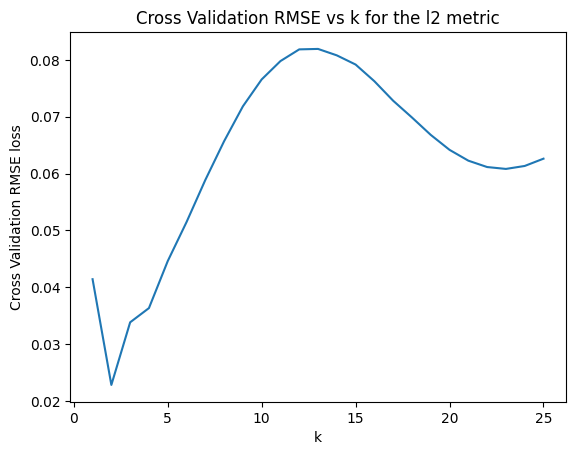

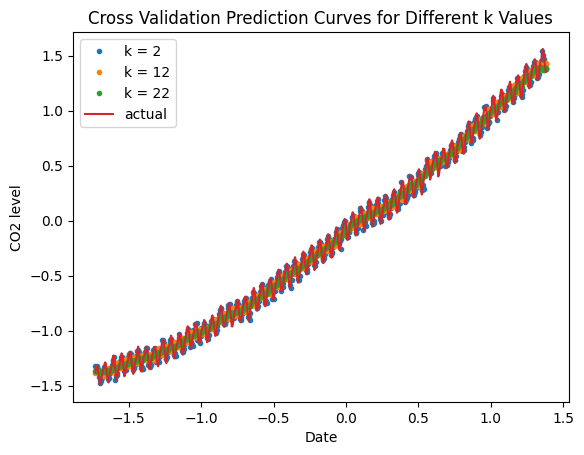

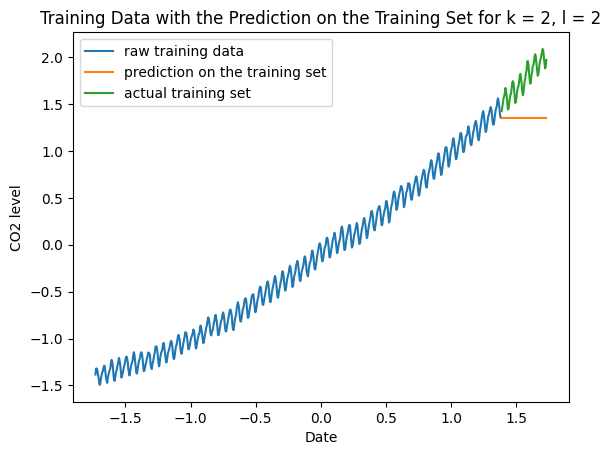

In [4]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')
# stack the sets for cross validation
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])         

min_RMSE = 10000
min_k, min_l = -1, -1
RMSE = 0
k_plot = []
RMSE_plot = []

for k in range(1,25+1):
    k_plot.append(k)
    RMSE_plot.append(cross_validation(x_train, y_train, k, 2))
        
# RMSE vs k
plt.plot(k_plot, RMSE_plot)
plt.title("Cross Validation RMSE vs k for the l2 metric")
plt.xlabel('k')
plt.ylabel('Cross Validation RMSE loss')
plt.show()

# CV prediction curves 
RMSE, x_plot_2, y_plot_2 = cross_validation(x_train, y_train, 2, 2, True)
RMSE, x_plot_12, y_plot_12 = cross_validation(x_train, y_train, 12, 2, True)
RMSE, x_plot_22, y_plot_22 = cross_validation(x_train, y_train, 22, 2, True)
plt.plot(x_plot_2, y_plot_2, '.')
plt.plot(x_plot_12, y_plot_12, '.')
plt.plot(x_plot_22, y_plot_22, '.')
plt.plot(x_train, y_train)
plt.legend(['k = 2','k = 12', 'k = 22', 'actual'])
plt.title('Cross Validation Prediction Curves for Different k Values')
plt.xlabel('Date')
plt.ylabel('CO2 level')
plt.show()

# prediction on the test set w/ k = 2, l = 2
y_pred_test = np.zeros((len(y_test), len(y_test[0])))
for i in range(len(x_test)):
    y_pred_test[i] = knn_regression(x_train, y_train, x_test[i], 2, 2)
plt.plot(x_train, y_train)
plt.plot(x_test, y_pred_test)
plt.plot(x_test, y_test)
plt.legend(['raw training data', 'prediction on the training set', 'actual training set'])
plt.title('Training Data with the Prediction on the Training Set for k = 2, l = 2')
plt.xlabel('Date')
plt.ylabel('CO2 level')
plt.show()

## Summary of Results

| Parameter | Mauna Loa | Rosenbrock | Puma |
| --- | --- | --- | --- |
|  Cross Validation RMSE | 0.041411701233336526 | 0.11665099096796594 | 0.7130840436084133 |
| $k$ | 2 | 1 | 27 |
| preferred $l$ | 2 | 2 | 2 |
| Test RMSE | 0.40466508623304215 | 0.06810446933737938 | 0.6731963627248986 |


## Q2: Using a KD Tree

In [1]:
def knn_regression_tree(x_train, y_train, x_test, k, l=2):
    '''
    k-d tree implementation: can account for the whole x_test vector
    '''
    tree = KDTree(x_train)
    k_nn = tree.query(x_test, k=k, return_distance=False, sort_results=False)
    y_star = np.mean(y_train[k_nn, 0], axis=1, keepdims=True)
    return y_star

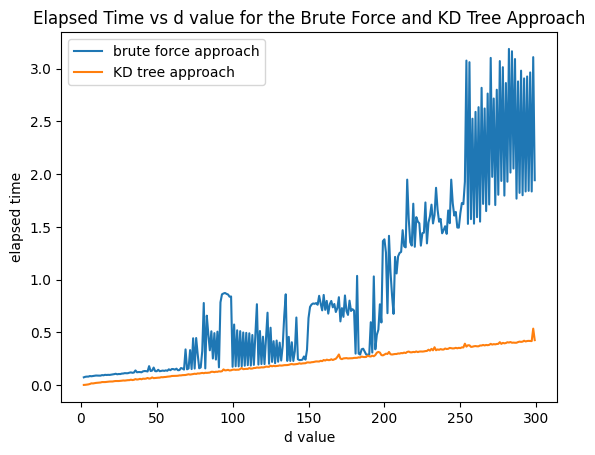

In [24]:
d_array = list(range(2, 300))
cur_time, end_time, elapsed = 0, 0, 0
brute_force = []
kd_tree = []
for d in d_array:
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('rosenbrock', n_train=1000, d=d)

    # brute force k-nn regression
    cur_time = time.time()
    for point in x_test:
        knn_regression(x_train, y_train, point, 5, 2)
    brute_force.append(time.time() - cur_time)

    # Tree k-nn regression
    cur_time = time.time()
    knn_regression_tree(x_train, y_train, x_test, 5, 2)
    kd_tree.append(time.time() - cur_time)

# Plotting for time analysis
plt.plot(d_array, brute_force)
plt.plot(d_array, kd_tree)
plt.legend(['brute force approach', 'KD tree approach'])
plt.xlabel('d value')
plt.ylabel('elapsed time')
plt.title('Elapsed Time vs d value for the Brute Force and KD Tree Approach')
plt.show()


    


## Q3: k-NN Classification
- to estimate k and the preferred distance metric, test the given validation set for accuracy across the training set. The optimal k value will be the one with the highest accuracy
- The prediction is right if ($y_{prediction}$ == $y_{actual}$).all() returns True

In [105]:
def knn_classifier(x_train, y_train, x_test, k, l=2):
    '''
    k-NN classification using k-d trees
    '''
    y_test = np.zeros((len(x_test), len(y_train[0])))
    if l == 2:
        tree = KDTree(x_train, metric='euclidean')
    elif l == 1:
        tree = KDTree(x_train, metric='manhattan')
    k_nn = tree.query(x_test, k=k, return_distance=False, sort_results=False)

    for i in range(len(k_nn)):
        vote, count = np.unique(y_train[k_nn[i]], return_counts=True, axis=0)
        y_test[i] = vote[np.argmax(count)]
    return y_test

Iris Data Set
- iris: $n_{train} = 104$, choose $k < \sqrt{104} = 11$

In [148]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('iris')

best_accuracy = -1
best_k = -1
best_l = -1

for k in list(range(1, 11+1)):
    for l in range(1, 2+1):
        count = 0
        y_predictions = knn_classifier(x_train, y_train, x_valid, k, l)
        is_correct = y_predictions == y_valid
        for i in range(len(is_correct)):
            if is_correct[i].all() == True:
                count += 1
        count = count/len(is_correct)
        if count > best_accuracy:
            best_accuracy = count
            best_k = k
            best_l = l
print('Optimal settings: k=', best_k, ', l=', best_l, 'with accuracy of', best_accuracy*100, '%')

    

Optimal settings: k= 7 , l= 2 with accuracy of 87.09677419354838 %


mnist Data Set
- given $n_{train} = 10 000$, use $n < \sqrt{10 000} < 100$

In [149]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mnist_small')

best_accuracy = -1
best_k = -1
best_l = -1

for k in list(range(1, 100+1)):
    for l in range(1, 2+1):
        count = 0
        y_predictions = knn_classifier(x_train, y_train, x_valid, k, l)
        is_correct = y_predictions == y_valid
        for i in range(len(is_correct)):
            if is_correct[i].all() == True:
                count += 1
        count = count/len(is_correct)
        if count > best_accuracy:
            best_accuracy = count
            best_k = k
            best_l = l
print('Optimal settings: k=', best_k, ', l=', best_l, 'with accuracy of', best_accuracy*100, '%')


Optimal settings: k= 1 , l= 2 with accuracy of 95.0 %


## Q4: Linear Regression

In [6]:
def linear_regression(x_train, y_train, x_test):
    # add a dummy one feature to each x_train and  point
    x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
    x_test = np.hstack([np.ones((x_test.shape[0], 1)), x_test])

    # Economy SVD
    U, sigma, V_t = scipy.linalg.svd(x_train, full_matrices=False, compute_uv=True)
    w = V_t.T.dot(U.T.dot(y_train) / np.reshape(sigma, (-1,1))) # -1 to let the program reshape by itself
    return x_test.dot(w) # the weighted prediction of test data

Linear Regression for Mauna Loa

In [176]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')

x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

y_prediction = linear_regression(x_train, y_train, x_test)
#print(y_prediction)
RMSE = np.sqrt(np.mean(np.square(y_test - y_prediction)))
print('RMSE:', RMSE)


RMSE: 0.3493883104991013


Linear Regression for Rosenbrock

In [175]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('rosenbrock', n_train=1000, d=2)

x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

y_prediction = linear_regression(x_train, y_train, x_test)
#print(y_prediction)
RMSE = np.sqrt(np.mean(np.square(y_test - y_prediction)))
print('RMSE:', RMSE)

RMSE: 0.9840872030687701


Linear Regression for pumadyn32nm

In [177]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')

x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

y_prediction = linear_regression(x_train, y_train, x_test)
#print(y_prediction)
RMSE = np.sqrt(np.mean(np.square(y_test - y_prediction)))
print('RMSE:', RMSE)

RMSE: 0.8622512436598077


Linear Regression for Iris

In [8]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('iris')

x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

y_prediction = linear_regression(x_train, y_train, x_test)
# accuracy = the number of correct predictions / total predictions, done using np.mean
accuracy = np.mean(np.argmax(y_prediction, axis=1) == np.argmax(y_test, axis=1)) * 100
print(accuracy)

86.66666666666667


Linear Regression for mnist

In [7]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mnist_small')

x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

y_prediction = linear_regression(x_train, y_train, x_test)
# accuracy = the number of correct predictions / total predictions, done using np.mean
accuracy = np.mean(np.argmax(y_prediction, axis=1) == np.argmax(y_test, axis=1)) * 100
print(accuracy)

85.8
